<a href="https://colab.research.google.com/github/Srija3108/Srija3108/blob/main/1(modified)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.signal import savgol_filter

# Step 1: Load Raman spectra data
# Ensure your file is uploaded in the session

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 1_Mod.txt to 1_Mod.txt


In [ ]:
data = pd.read_csv(list(uploaded.keys())[0],delimiter='\t')
print(data.head())

         #Wave  Unnamed: 1  #Intensity
0  4002.560547   60.950768         NaN
1  4001.999023   63.192924         NaN
2  4001.436523   59.113201         NaN
3  4000.875000   36.783939         NaN
4  4000.312500   43.734604         NaN




---



In [ ]:
print("Column names:", data.columns)

Column names: Index(['#Wave', 'Unnamed: 1', '#Intensity'], dtype='object')


In [ ]:

    wavenumber = data['#Wave']
    intensity = data['Unnamed: 1']


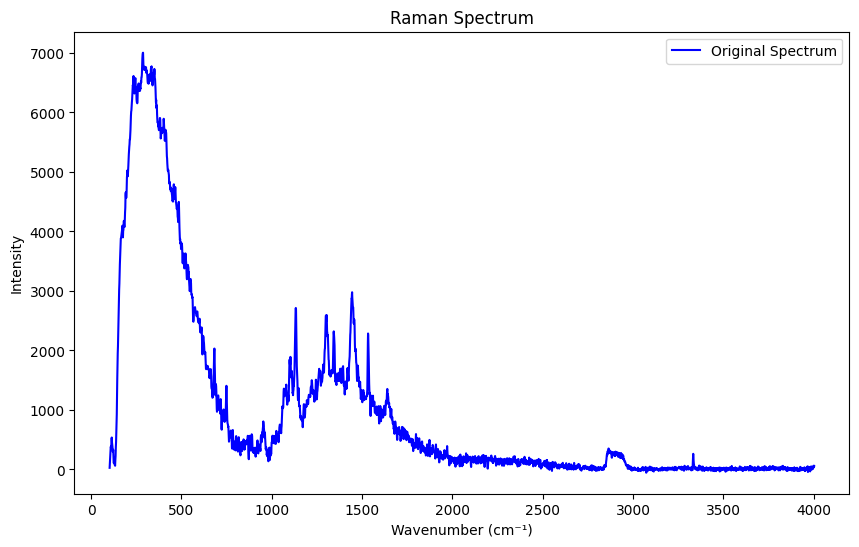

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(wavenumber, intensity, label='Original Spectrum', color='blue')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity')
plt.title('Raman Spectrum')
plt.legend()
plt.show()

In [ ]:
smoothed_intensity = savgol_filter(intensity, window_length=20, polyorder=3)

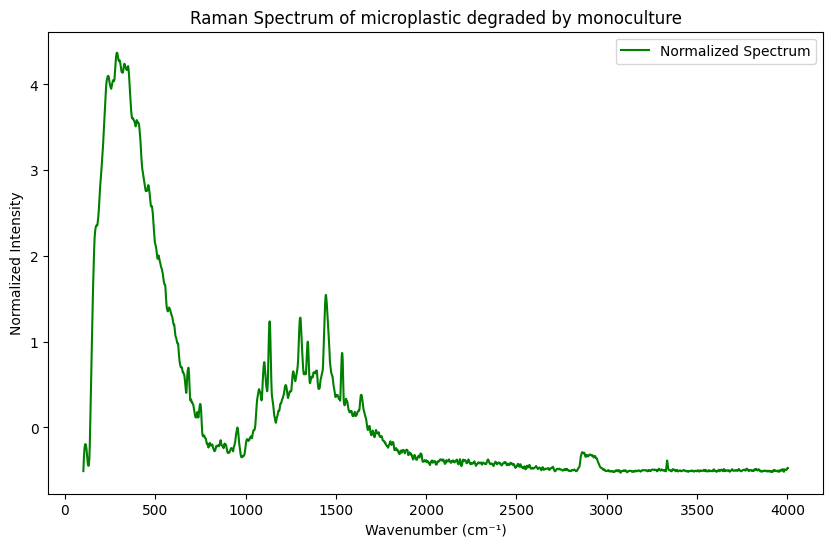

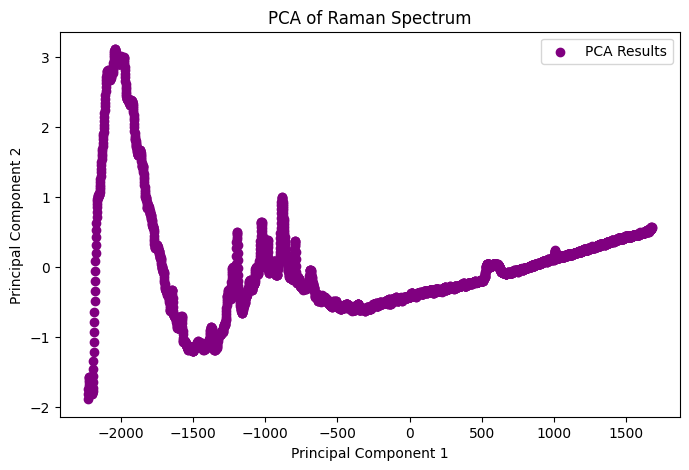

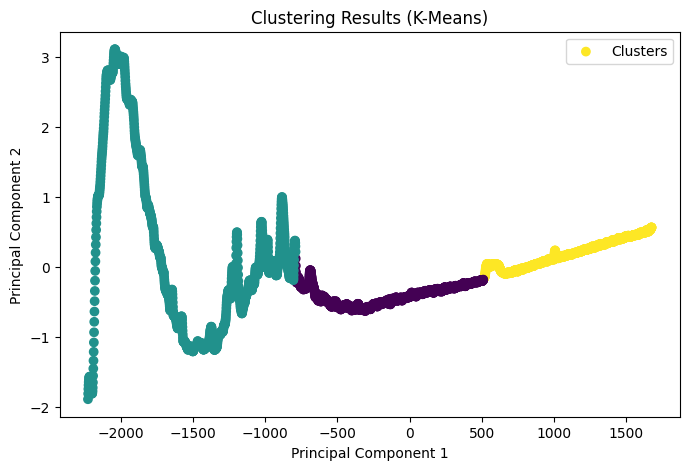

In [ ]:



# Option 2: Normalize the intensity
scaler = StandardScaler()
normalized_intensity = scaler.fit_transform(smoothed_intensity.reshape(-1, 1)).flatten()

# Visualize the processed spectrum
plt.figure(figsize=(10, 6))
plt.plot(wavenumber, normalized_intensity, label='Normalized Spectrum', color='green')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Normalized Intensity')
plt.title('Raman Spectrum of microplastic degraded by monoculture')
plt.legend()
plt.show()

# Step 4: Dimensionality reduction using PCA
# Combine wavenumber and normalized intensity for PCA
data_for_pca = np.column_stack((wavenumber, normalized_intensity))

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
pca_result = pca.fit_transform(data_for_pca)

# Visualize the PCA results
plt.figure(figsize=(8, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='purple', label='PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Raman Spectrum')
plt.legend()
plt.show()

# Step 5: Clustering using K-Means (optional)
# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters
labels = kmeans.fit_predict(pca_result)

# Visualize the clustering
plt.figure(figsize=(8, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', label='Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results (K-Means)')
plt.legend()
plt.show()

# Step 6: Identify patterns (if needed)
# Analyze clusters or investigate specific regions of the spectrum as per requirements


Clustered data preview:
         #Wave  Unnamed: 1  #Intensity  Cluster
0  4002.560547   60.950768         NaN        2
1  4001.999023   63.192924         NaN        2
2  4001.436523   59.113201         NaN        2
3  4000.875000   36.783939         NaN        2
4  4000.312500   43.734604         NaN        2


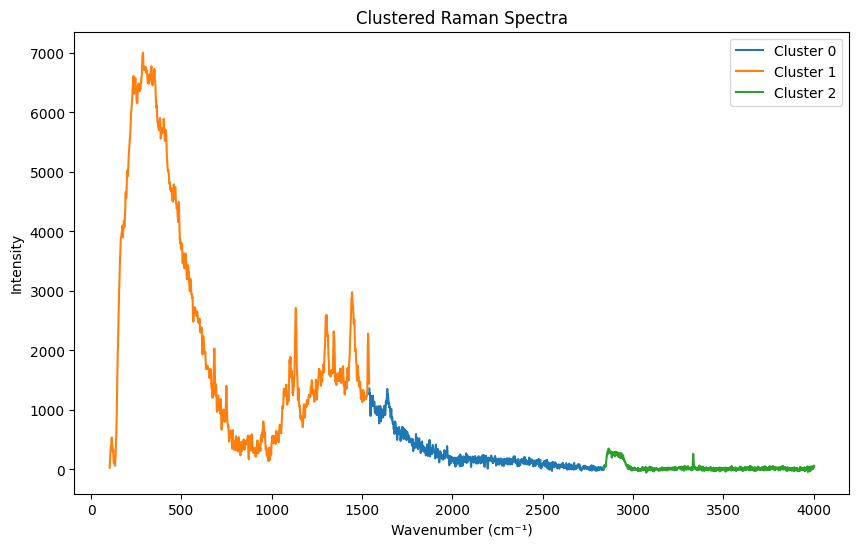

In [ ]:
# Step 6: Identify potential microplastic groups
# Analyze the clusters
data['Cluster'] = labels  # Change 'clusters' to 'labels'
print("Clustered data preview:")
print(data.head())

# Step 7 (Optional): Investigate each cluster
# Visualize the spectra of each cluster
unique_clusters = np.unique(labels)  # Change 'clusters' to 'labels'
plt.figure(figsize=(10, 6))
for cluster in unique_clusters:
    cluster_data = data[data['Cluster'] == cluster]
    plt.plot(cluster_data['#Wave'], cluster_data['Unnamed: 1'], label=f"Cluster {cluster}") # Change '#Intensity' to data['Unnamed: 1'] since your data doesn't have column #Intensity
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity')
plt.title('Clustered Raman Spectra')
plt.legend()
plt.show()